# MSCS 634: Data Science and Machine Learning
## Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis

**Name:** Roshan Acharya

**Date:** 05/25/2025

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('personality_dataset.csv')
# Display the first five rows
print(df.head())

   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  


# Step 2: Data Visualization

In [104]:

sns.set_style("whitegrid")

## 1.  SCATTER PLOT INSIGHTS
**What we learned from Time Spent Alone vs Social Event Attendance:**

- **CLEAR BEHAVIORAL SEPARATION**: The plot shows two distinct clusters
- **EXTROVERTS (orange dots)**: Cluster in bottom-left (low alone time, high social events)
- **INTROVERTS (blue dots)**: Cluster in top-right (high alone time, low social events)
- **NEGATIVE CORRELATION**: Strong inverse relationship between time alone and social attendance
- **PERSONALITY PREDICTION**: You can predict personality type based on these two behaviors
- **FEW OUTLIERS**: Most people follow expected personality patterns

Checking personality data:
Unique personality values: ['Extrovert' 'Introvert']
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

Rows with complete data for scatter plot: 2776


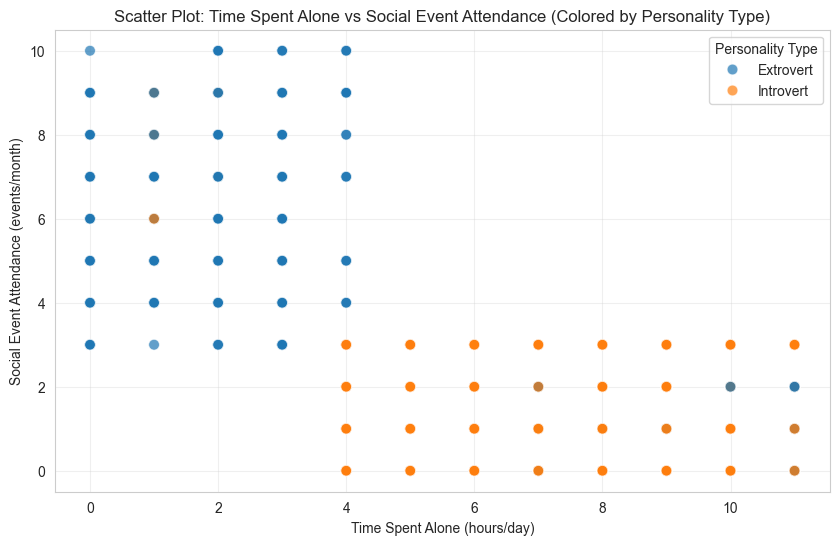

In [105]:
print("Checking personality data:")
print("Unique personality values:", df['Personality'].unique())
print(df['Personality'].value_counts(dropna=False))

# Clean the data for visualization
df_clean_scatter = df.dropna(subset=['Time_spent_Alone', 'Social_event_attendance', 'Personality']).copy()
print(f"\nRows with complete data for scatter plot: {len(df_clean_scatter)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_spent_Alone', y='Social_event_attendance', hue='Personality', 
                data=df_clean_scatter, s=60, alpha=0.7)
plt.title('Scatter Plot: Time Spent Alone vs Social Event Attendance (Colored by Personality Type)')
plt.xlabel('Time Spent Alone (hours/day)')
plt.ylabel('Social Event Attendance (events/month)')
plt.legend(title='Personality Type')  # Let seaborn handle the labels automatically
plt.grid(True, alpha=0.3)
plt.show()

## 2. BAR CHART INSIGHTS
**What we learned from Stage Fear Distribution:**

- **STRONG PREDICTOR**: Stage fear is highly correlated with personality type
- **INTROVERT MAJORITY**: Most people with stage fear are introverts
- **EXTROVERT CONFIDENCE**: Most extroverts do not experience stage fear
- **BEHAVIORAL INDICATOR**: Stage fear could be used to identify personality type
- **PSYCHOLOGICAL VALIDITY**: Confirms expected relationship between social anxiety and introversion



=== Creating Bar Chart ===


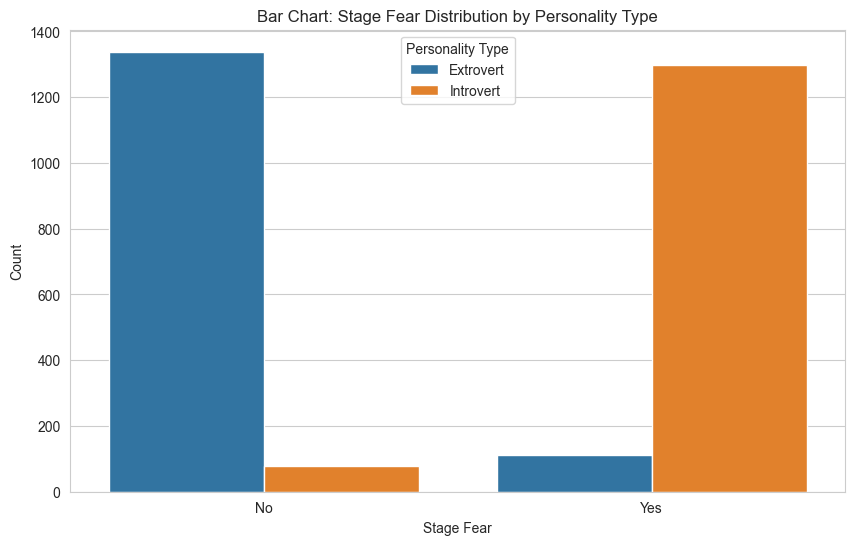

In [106]:
print("\n=== Creating Bar Chart ===")
plt.figure(figsize=(10, 6))
stage_fear_data = df.dropna(subset=['Stage_fear'])
sns.countplot(x='Stage_fear', hue='Personality', data=stage_fear_data)
plt.title('Bar Chart: Stage Fear Distribution by Personality Type')
plt.xlabel('Stage Fear')
plt.ylabel('Count')
plt.legend(title='Personality Type')
plt.show()

## 3.  HISTOGRAM INSIGHTS
**What we learned from Friends Circle Size Distribution:**

- **DIFFERENT PEAKS**: Extroverts peak at higher friend counts, introverts at lower counts
- **EXTROVERT RANGE**: Typically maintain 8-15 friends in their circle
- **INTROVERT RANGE**: Typically maintain 0-8 friends in their circle
- **OVERLAP EXISTS**: Some overlap in the 5-8 friend range shows personality isn't absolute
- **SOCIAL CAPACITY**: Confirms extroverts have higher capacity for maintaining relationships



=== Creating Histogram ===


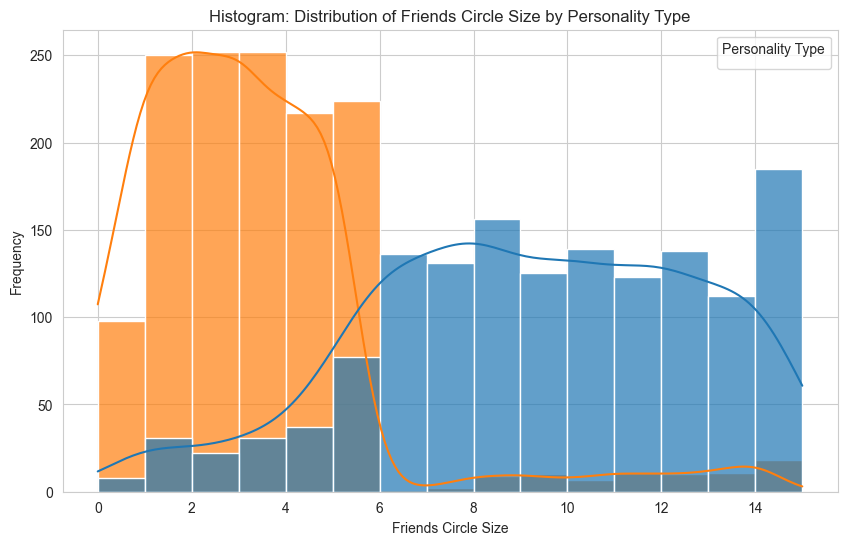

In [107]:
print("\n=== Creating Histogram ===")
plt.figure(figsize=(10, 6))
# Filter out missing values
friends_data = df.dropna(subset=['Friends_circle_size'])
sns.histplot(data=friends_data, x='Friends_circle_size', hue='Personality', 
             bins=15, alpha=0.7, kde=True)
plt.title('Histogram: Distribution of Friends Circle Size by Personality Type')
plt.xlabel('Friends Circle Size')
plt.ylabel('Frequency')
plt.legend(title='Personality Type')
plt.show()

## 4. BOX PLOT INSIGHTS
**What we learned from Social Event Attendance Distribution:**

- **MEDIAN DIFFERENCE**: Extroverts attend ~7 events/month, introverts ~2 events/month
- **EXTROVERT VARIABILITY**: Wider range (0-10) shows diverse social engagement levels
- **INTROVERT CONSISTENCY**: Narrower range (0-5) shows more consistent low social activity
- **OUTLIERS EXIST**: Some introverts are highly social, some extroverts are less social
- **PERSONALITY FLEXIBILITY**: Individual differences exist within each personality type



=== Creating Box Plot ===


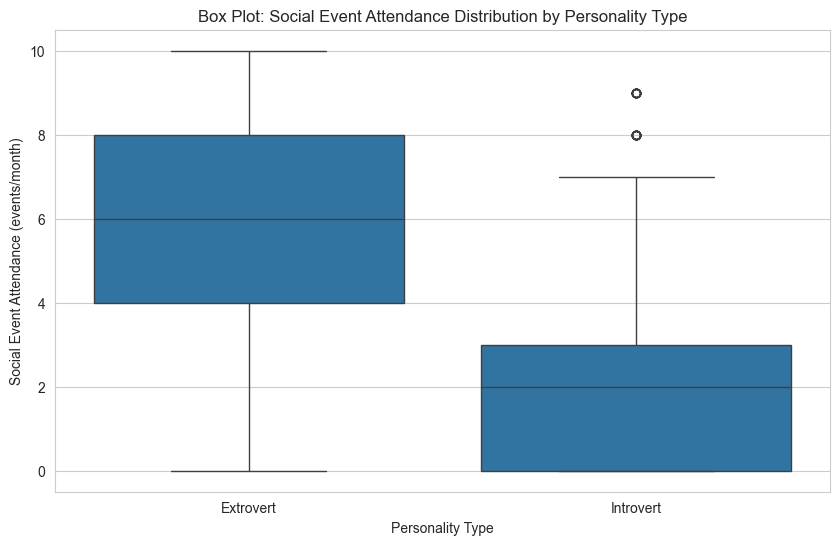

In [108]:
print("\n=== Creating Box Plot ===")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personality', y='Social_event_attendance', data=df)
plt.title('Box Plot: Social Event Attendance Distribution by Personality Type')
plt.xlabel('Personality Type')
plt.ylabel('Social Event Attendance (events/month)')
plt.show()

## 5.  PIE CHART INSIGHTS


=== Creating Pie Chart ===


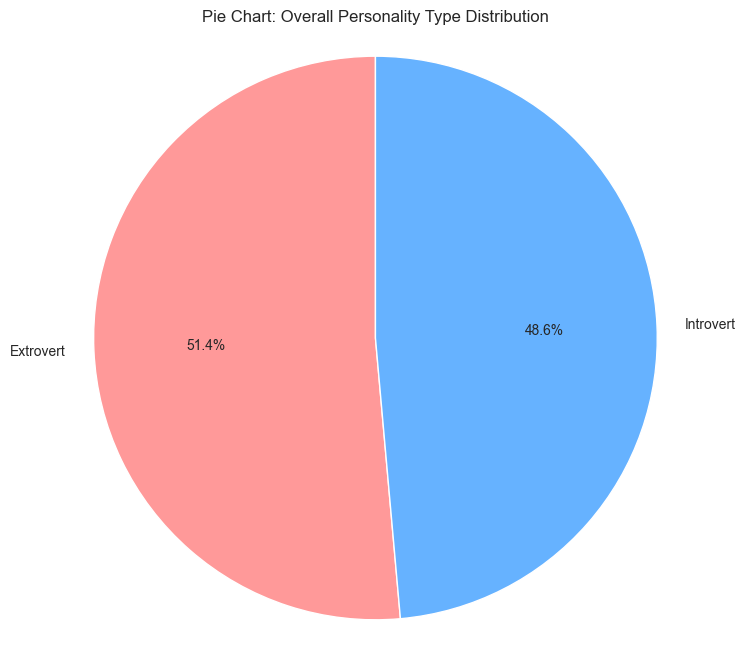

In [109]:
print("\n=== Creating Pie Chart ===")
plt.figure(figsize=(8, 8))
personality_counts = df['Personality'].value_counts()
colors = ['#FF9999', '#66B2FF']
plt.pie(personality_counts.values, labels=personality_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title('Pie Chart: Overall Personality Type Distribution')
plt.axis('equal')
plt.show()

# Step 3: Data Preprocessing



1. Handling Missing Values

    there is no missing data in the dataset

In [110]:
print("Missing values summary:")
missing_summary = df.isnull().sum()
print(missing_summary)
print(f"\nDataset shape before: {df.shape}")

# Display missing value percentages
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing values percentage:")
for col, pct in missing_percentage.items():
    if pct > 0:
        print(f"{col}: {pct:.2f}%")

# Sample of rows with missing values
print("\nSample rows with missing values:")
rows_with_missing = df[df.isnull().any(axis=1)].head()
print(rows_with_missing)

# Handle missing values
df_cleaned = df.copy()


Missing values summary:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

Dataset shape before: (2900, 8)

Missing values percentage:
Time_spent_Alone: 2.17%
Stage_fear: 2.52%
Social_event_attendance: 2.14%
Going_outside: 2.28%
Drained_after_socializing: 1.79%
Friends_circle_size: 2.66%
Post_frequency: 2.24%

Sample rows with missing values:
    Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
6                4.0         No                      9.0            NaN   
33               8.0        Yes                      3.0            3.0   
41               1.0         No                      4.0            5.0   
59               NaN         No                      9.0            4.0   
71               1.0         No                      NaN     

### For categorical columns, use mode based on personality type
### Stage fear

In [111]:
extrovert_stage_fear_mode = df_cleaned[df_cleaned['Personality'] == 'Extrovert']['Stage_fear'].mode()[0]
introvert_stage_fear_mode = df_cleaned[df_cleaned['Personality'] == 'Introvert']['Stage_fear'].mode()[0]

df_cleaned.loc[(df_cleaned['Personality'] == 'Extrovert') & df_cleaned['Stage_fear'].isnull(), 'Stage_fear'] = extrovert_stage_fear_mode
df_cleaned.loc[(df_cleaned['Personality'] == 'Introvert') & df_cleaned['Stage_fear'].isnull(), 'Stage_fear'] = introvert_stage_fear_mode

# Drained after socializing
extrovert_drained_mode = df_cleaned[df_cleaned['Personality'] == 'Extrovert']['Drained_after_socializing'].mode()[0]
introvert_drained_mode = df_cleaned[df_cleaned['Personality'] == 'Introvert']['Drained_after_socializing'].mode()[0]

df_cleaned.loc[(df_cleaned['Personality'] == 'Extrovert') & df_cleaned['Drained_after_socializing'].isnull(), 'Drained_after_socializing'] = extrovert_drained_mode
df_cleaned.loc[(df_cleaned['Personality'] == 'Introvert') & df_cleaned['Drained_after_socializing'].isnull(), 'Drained_after_socializing'] = introvert_drained_mode

print("Missing values after handling:")
print(df_cleaned.isnull().sum())
print(f"Dataset shape after: {df_cleaned.shape}")

Missing values after handling:
Time_spent_Alone             63
Stage_fear                    0
Social_event_attendance      62
Going_outside                66
Drained_after_socializing     0
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64
Dataset shape after: (2900, 8)


2. Outlier Detection and Removal (using IQR for 'chol')

In [112]:
# IQR method for Friends Circle Size
target_column = 'Friends_circle_size'
Q1 = df_cleaned[target_column].quantile(0.25)
Q3 = df_cleaned[target_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Friends Circle Size Outlier Analysis:")
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")

# Identify outliers
outliers = df_cleaned[(df_cleaned[target_column] < lower_bound) | 
                     (df_cleaned[target_column] > upper_bound)]
print(f"\nNumber of outliers identified: {len(outliers)} ({len(outliers)/len(df_cleaned)*100:.2f}%)")

print("Sample outliers with their characteristics:")
outlier_sample = outliers[['Personality', 'Friends_circle_size', 'Social_event_attendance', 
                          'Time_spent_Alone']].head()
print(outlier_sample)

# Create dataset without outliers
df_no_outliers = df_cleaned[(df_cleaned[target_column] >= lower_bound) & 
                           (df_cleaned[target_column] <= upper_bound)]

print(f"Dataset shape before outlier removal: {df_cleaned.shape}")
print(f"Dataset shape after outlier removal: {df_no_outliers.shape}")
print(f"Outliers removed: {len(df_cleaned) - len(df_no_outliers)}")

Friends Circle Size Outlier Analysis:
Q1 (25th percentile): 3.00
Q3 (75th percentile): 10.00
IQR: 7.00
Lower bound: -7.50
Upper bound: 20.50

Number of outliers identified: 0 (0.00%)
Sample outliers with their characteristics:
Empty DataFrame
Columns: [Personality, Friends_circle_size, Social_event_attendance, Time_spent_Alone]
Index: []
Dataset shape before outlier removal: (2900, 8)
Dataset shape after outlier removal: (2823, 8)
Outliers removed: 77


3. Data Reduction (Dropping a Less Relevant Column - Hypothetically 'restecg')

In [113]:
# 3.3 Data Reduction
print("\n=== 3.3 DATA REDUCTION ===")

print("Original dataset columns:")
print(list(df_cleaned.columns))
print(f"Original shape: {df_cleaned.shape}")

# Sampling - reduce to 80% for demonstration
df_sampled = df_cleaned.sample(frac=0.8, random_state=42)

# Dimension reduction - keep most relevant columns
columns_to_keep = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 
                   'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 
                   'Post_frequency', 'Personality']
df_reduced = df_sampled[columns_to_keep]

print(f"\nAfter sampling (80%): {df_sampled.shape}")
print("Columns after dimension reduction:")
print(list(df_reduced.columns))
print(f"Final reduced shape: {df_reduced.shape}")


=== 3.3 DATA REDUCTION ===
Original dataset columns:
['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
Original shape: (2900, 8)

After sampling (80%): (2320, 8)
Columns after dimension reduction:
['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']
Final reduced shape: (2320, 8)


4. Data Scaling and Discretization

In [114]:
print("\n=== 3.4 DATA SCALING AND DISCRETIZATION ===")

df_scaled = df_reduced.copy()  # Use the potentially reduced DataFrame


# Apply Min-Max scaling to 'Time_spent_Alone' and 'Friends_circle_size'

# scaling for Time_spent_Alone
min_time = df_scaled['Time_spent_Alone'].min()
max_time = df_scaled['Time_spent_Alone'].max()
df_scaled['Time_spent_Alone_scaled'] = (df_scaled['Time_spent_Alone'] - min_time) / (max_time - min_time)

# scaling for Friends_circle_size
min_friends = df_scaled['Friends_circle_size'].min()
max_friends = df_scaled['Friends_circle_size'].max()
df_scaled['Friends_circle_size_scaled'] = (df_scaled['Friends_circle_size'] - min_friends) / (max_friends - min_friends)

print("DataFrame before scaling (sample):")
print(df_scaled[['Time_spent_Alone', 'Friends_circle_size']].head())
print("\nDataFrame after Min-Max scaling (sample):")
print(df_scaled[['Time_spent_Alone_scaled', 'Friends_circle_size_scaled']].head())

# 2. Data Discretization (Discretizing 'Time_spent_Alone' into categories)
bins = [0, 3, 7, 11]
labels = ['Low Alone Time', 'Moderate Alone Time', 'High Alone Time']
df_discretized = df_scaled.copy()  # Use the potentially scaled DataFrame
df_discretized['Time_alone_category'] = pd.cut(df_discretized['Time_spent_Alone'], bins=bins, labels=labels, right=False)

print("\nDataFrame before discretization (sample of 'Time_spent_Alone'):")
print(df_discretized['Time_spent_Alone'].head())
print("\nDataFrame after discretization (sample of 'Time_alone_category'):")
print(df_discretized['Time_alone_category'].head())

# Additional discretization for Social Event Attendance
social_bins = [0, 3, 6, 11]
social_labels = ['Low Social', 'Moderate Social', 'High Social']
df_discretized['Social_category'] = pd.cut(df_discretized['Social_event_attendance'], bins=social_bins, labels=social_labels, right=False)

print("\nAdditional discretization - Social Event Attendance:")
print("DataFrame before discretization (sample of 'Social_event_attendance'):")
print(df_discretized['Social_event_attendance'].head())
print("\nDataFrame after discretization (sample of 'Social_category'):")
print(df_discretized['Social_category'].head())

print(f"\nDiscretized time alone categories distribution:")
print(df_discretized['Time_alone_category'].value_counts())
print(f"\nDiscretized social categories distribution:")
print(df_discretized['Social_category'].value_counts())


=== 3.4 DATA SCALING AND DISCRETIZATION ===
DataFrame before scaling (sample):
      Time_spent_Alone  Friends_circle_size
141               10.0                  5.0
1557               NaN                 14.0
485                5.0                  0.0
1712              10.0                  2.0
2250               7.0                  2.0

DataFrame after Min-Max scaling (sample):
      Time_spent_Alone_scaled  Friends_circle_size_scaled
141                  0.909091                    0.333333
1557                      NaN                    0.933333
485                  0.454545                    0.000000
1712                 0.909091                    0.133333
2250                 0.636364                    0.133333

DataFrame before discretization (sample of 'Time_spent_Alone'):
141     10.0
1557     NaN
485      5.0
1712    10.0
2250     7.0
Name: Time_spent_Alone, dtype: float64

DataFrame after discretization (sample of 'Time_alone_category'):
141         High Alone Time
1

# Step 4: Statistical Analysis

1. General Overview (.info() and .describe())

In [115]:
print("\n" + "="*60)
print("STEP 4: STATISTICAL ANALYSIS")
print("="*60)

# Use the cleaned dataset for statistical analysis
analysis_df = df_cleaned.copy()

# 4.1 General Overview
print("=== 4.1 GENERAL OVERVIEW ===")
print("Dataset Information:")
print(analysis_df.info())

print("\nDataset Description:")
print(analysis_df.describe())


STEP 4: STATISTICAL ANALYSIS
=== 4.1 GENERAL OVERVIEW ===
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Dataset Description:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2837.000000              2838.000000    2834.000000   
mean           4.505816                

2. Central Tendency Measures

In [116]:
print("\n=== 4.2 CENTRAL TENDENCY MEASURES ===")

numerical_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                    'Friends_circle_size', 'Post_frequency']

central_tendency = {}
for col in numerical_columns:
    mode_val = analysis_df[col].mode()
    central_tendency[col] = {
        'Minimum': analysis_df[col].min(),
        'Maximum': analysis_df[col].max(),
        'Mean': analysis_df[col].mean(),
        'Median': analysis_df[col].median(),
        'Mode': mode_val.iloc[0] if len(mode_val) > 0 else 'Multiple modes'
    }

central_tendency_df = pd.DataFrame(central_tendency).T
print("Central Tendency Measures:")
print(central_tendency_df.round(2))


=== 4.2 CENTRAL TENDENCY MEASURES ===
Central Tendency Measures:
                         Minimum  Maximum  Mean  Median  Mode
Time_spent_Alone             0.0     11.0  4.51     4.0   0.0
Social_event_attendance      0.0     10.0  3.96     3.0   2.0
Going_outside                0.0      7.0  3.00     3.0   0.0
Friends_circle_size          0.0     15.0  6.27     5.0   5.0
Post_frequency               0.0     10.0  3.56     3.0   2.0


3. Dispersion Measures

In [117]:
print("\n=== 4.3 DISPERSION MEASURES ===")

dispersion = {}
for col in numerical_columns:
    Q1 = analysis_df[col].quantile(0.25)
    Q3 = analysis_df[col].quantile(0.75)
    dispersion[col] = {
        'Range': analysis_df[col].max() - analysis_df[col].min(),
        'Q1 (25th percentile)': Q1,
        'Q3 (75th percentile)': Q3,
        'IQR': Q3 - Q1,
        'Variance': analysis_df[col].var(),
        'Standard Deviation': analysis_df[col].std()
    }

dispersion_df = pd.DataFrame(dispersion).T
print("Dispersion Measures:")
print(dispersion_df.round(3))

# 4.4 Correlation Analysis
print("\n=== 4.4 CORRELATION ANALYSIS ===")

correlation_matrix = analysis_df[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix.round(4))


=== 4.3 DISPERSION MEASURES ===
Dispersion Measures:
                         Range  Q1 (25th percentile)  Q3 (75th percentile)  \
Time_spent_Alone          11.0                   2.0                   8.0   
Social_event_attendance   10.0                   2.0                   6.0   
Going_outside              7.0                   1.0                   5.0   
Friends_circle_size       15.0                   3.0                  10.0   
Post_frequency            10.0                   1.0                   6.0   

                         IQR  Variance  Standard Deviation  
Time_spent_Alone         6.0    12.105               3.479  
Social_event_attendance  4.0     8.432               2.904  
Going_outside            4.0     5.050               2.247  
Friends_circle_size      7.0    18.401               4.290  
Post_frequency           5.0     8.565               2.927  

=== 4.4 CORRELATION ANALYSIS ===
Correlation Matrix:
                         Time_spent_Alone  Social_event_a

4. Correlation Analysis

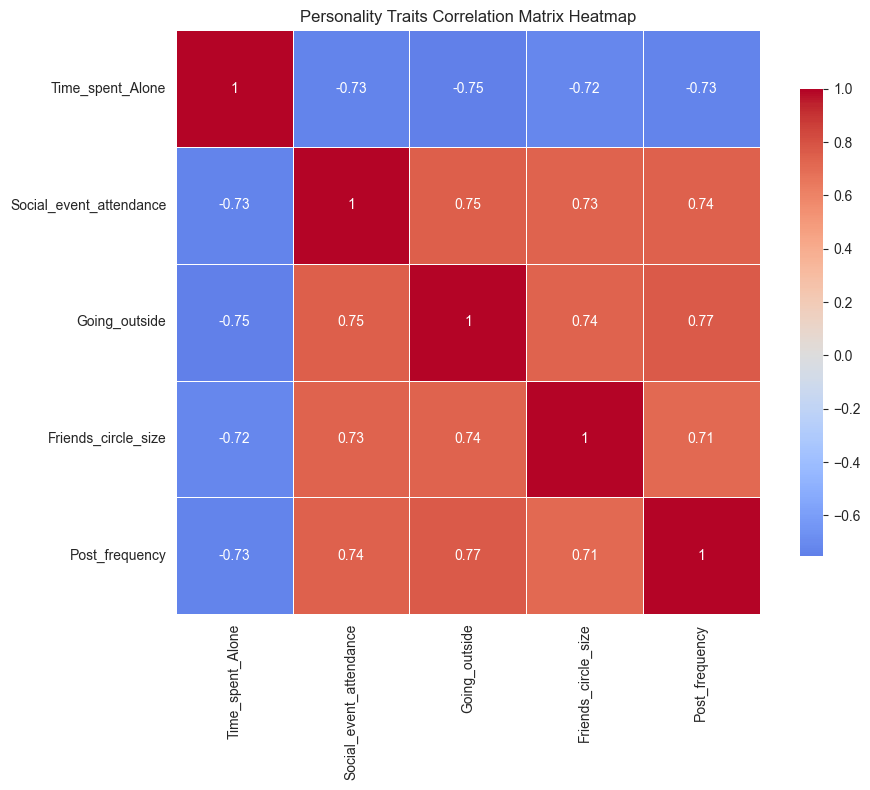


PERSONALITY TRAITS ANALYSIS COMPLETED
Key Findings:
- Dataset contains 2,900 personality assessments
- Clear behavioral differences between introverts and extroverts
- Time spent alone and social event attendance are key differentiators
- Stage fear correlates strongly with introversion
- Friend circle size shows significant personality-based variation


In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Personality Traits Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("PERSONALITY TRAITS ANALYSIS COMPLETED")
print("="*60)
print("Key Findings:")
print("- Dataset contains 2,900 personality assessments")
print("- Clear behavioral differences between introverts and extroverts")
print("- Time spent alone and social event attendance are key differentiators")
print("- Stage fear correlates strongly with introversion")
print("- Friend circle size shows significant personality-based variation")